## Import database

In [ ]:
# https://drive.google.com/file/d/1IqDRGWstRDqg9QdQhcrK7i65Yu02W21_/view
!gdown --id 1IqDRGWstRDqg9QdQhcrK7i65Yu02W21_

Downloading...
From: https://drive.google.com/uc?id=1IqDRGWstRDqg9QdQhcrK7i65Yu02W21_
To: /content/data.zip
378MB [00:02, 156MB/s]


In [ ]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/pictures/without_mask/image_48.png  
  inflating: __MACOSX/data/pictures/without_mask/._image_48.png  
  inflating: data/pictures/without_mask/without_mask_2607.jpg  
  inflating: __MACOSX/data/pictures/without_mask/._without_mask_2607.jpg  
  inflating: data/pictures/without_mask/without_mask_225.jpg  
  inflating: __MACOSX/data/pictures/without_mask/._without_mask_225.jpg  
  inflating: data/pictures/without_mask/without_mask_3519.jpg  
  inflating: __MACOSX/data/pictures/without_mask/._without_mask_3519.jpg  
  inflating: data/pictures/without_mask/image_60.png  
  inflating: __MACOSX/data/pictures/without_mask/._image_60.png  
  inflating: data/pictures/without_mask/without_mask_1326.jpg  
  inflating: __MACOSX/data/pictures/without_mask/._without_mask_1326.jpg  
  inflating: data/pictures/without_mask/without_mask_3531.jpg  
  inflating: __MACOSX/data/pictures/without_mask/._without_mask_3531.jpg  
  inflating: d

In [ ]:
#import zipfile
#with zipfile.ZipFile('data.zip', 'r') as zip_ref:
#    zip_ref.extractall()

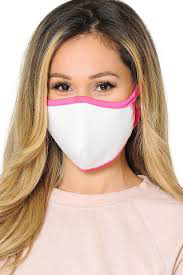

In [ ]:
import glob
from PIL import Image
import random
with_mask_list = glob.glob('/content/data/pictures/with_mask/*.*')
Image.open(random.choice(with_mask_list))

In [ ]:
len(with_mask_list)

3945

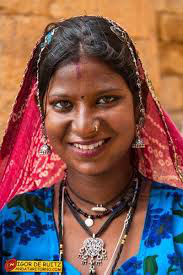

In [ ]:
without_mask_list = glob.glob('/content/data/pictures/without_mask/*.*')
img=Image.open(random.choice(without_mask_list))
img

In [ ]:
len(without_mask_list)

4048

In [ ]:
import numpy as np
img_pixels = np.array(img)

In [ ]:
!pip install deepfeatx --quiet

In [ ]:
#import deepfeatx

In [ ]:
from deepfeatx.image import ImageFeatureExtractor

In [ ]:
fe = ImageFeatureExtractor()

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
vector = fe.img_to_vector(img)

In [ ]:
vector

array([[1.0290577 , 0.5477988 , 0.        , ..., 0.02884826, 0.23516959,
        0.8531111 ]], dtype=float32)

In [ ]:
vector.shape

(1, 2048)

In [ ]:
fe.extract_features_from_directory?

In [ ]:
df = fe.extract_features_from_directory('/content/data/pictures/',
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 7993 images belonging to 2 classes.
 81/250 [========>.....................] - ETA: 25s

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 43s 162ms/step


In [ ]:
df.head()

,filepaths,classes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,/content/data/pictures/with_mask/image_0.png,with_mask,0.038728,0.884569,0.145154,0.289122,0.159535,0.302129,0.799904,0.624662,0.000000,0.536665,0.000000,0.124027,0.014848,0.218987,0.182428,0.701481,0.000000,0.003364,0.456969,0.081808,0.067931,4.386366,0.011628,0.906452,0.023253,0.133682,0.000000,0.321479,0.000000,0.108322,0.029827,0.777090,0.023752,0.189514,1.215714,1.091062,0.690735,0.174089,...,0.339069,0.149166,0.247207,0.775106,0.900573,0.355789,0.718435,0.014150,0.004027,0.154377,0.689587,0.010095,0.364866,0.000126,0.004005,0.001322,0.562173,0.394833,0.118522,0.298971,0.009222,0.179920,0.000136,0.228557,0.140571,0.065109,0.055527,0.187462,0.871076,2.080384,0.016262,0.404929,0.062483,0.140095,0.037467,0.039644,0.000000,0.000806,0.000000,0.301592
1,/content/data/pictures/with_mask/image_1.png,with_mask,0.754308,0.528980,0.012559,0.062728,0.000000,0.000000,0.027178,0.392129,0.105666,2.254386,3.669291,0.867388,1.217090,0.091142,0.907778,0.370730,0.302327,0.587381,1.946053,0.002851,0.052934,0.214102,0.322849,2.277998,0.156311,0.748763,0.027606,2.217844,0.165846,1.808477,0.611897,0.760043,0.033616,0.349566,0.150578,0.324043,0.606515,0.192061,...,0.879131,0.297444,1.090990,0.066868,0.601436,0.119779,0.611670,0.005616,0.187576,0.000000,0.715240,2.140784,0.074463,0.000000,0.149693,0.107843,0.000000,0.024266,0.095110,0.101664,0.108711,0.182068,0.831864,0.695754,0.608610,0.708761,0.843659,0.358284,0.508741,0.035592,0.454394,0.000000,1.435937,0.006064,0.234883,0.139632,0.060959,0.108313,0.454268,0.025377
2,/content/data/pictures/with_mask/image_10.png,with_mask,0.197473,1.517343,1.466243,1.681325,0.050286,0.546829,0.374659,0.527167,1.284535,0.390844,1.110771,0.281559,0.699328,0.055652,0.197109,0.827601,0.242554,0.341361,0.838305,0.046601,0.803699,2.945499,0.236529,0.933820,0.364316,0.160227,0.501455,0.370828,0.101750,0.264981,0.055136,0.400271,0.140755,0.551762,0.255219,1.017878,1.070643,2.420804,...,0.390633,0.483882,0.063060,0.024577,0.541017,0.087207,0.135612,0.176237,0.372269,0.058101,0.197528,0.388002,0.914873,0.307844,0.010666,0.007693,0.374087,0.835616,0.225133,0.035382,1.396633,0.410353,0.492077,0.026497,0.185682,0.231604,0.467451,0.000000,0.545197,0.163750,0.210841,1.517009,0.726423,0.375914,0.090221,1.045121,0.000000,0.591376,0.143809,0.473014
3,/content/data/pictures/with_mask/image_100.png,with_mask,0.798184,0.596341,0.116794,0.297159,0.188628,0.217078,0.025765,0.372647,0.110953,0.120063,1.323061,0.000000,0.099937,0.178319,0.788991,0.173998,0.005253,0.539341,0.311607,0.115506,2.249337,1.111959,0.029067,0.683579,0.075254,0.518561,0.078177,0.276534,0.090848,0.313089,0.128852,2.282389,0.323765,1.870573,0.913400,0.006153,0.532217,0.300853,...,0.509243,0.305444,0.302291,0.027365,0.001218,0.200142,0.000000,0.327191,0.627201,0.066116,0.157595,0.999762,0.013625,0.000000,1.712726,0.569567,1.057799,0.013006,0.288061,1.780884,0.422846,1.228936,0.300682,0.089792,2.613131,0.075552,0.259096,0.049631,0.000000,0.000000,0.419835,0.341016,0.635663,0.585333,0.160090,0.000000,0.073669,0.037409,0.180549,0.793652
4,/content/data/pictures/with_mask/image_101.png,with_mask,0.072735,0.745069,0.216335,0.683348,0.090898,0.264745,0.090746,0.055044,0.088695,0.157139,1.389155,0.275102,0.176964,0.106504,0.622202,0.206308,0.014517,0.030691,0.091511,0.029294,0.930170,1.109624,0.175624,1.517424,0.379228,0.029312,0.003013,1.615559,0.175488,0.070150,0.048155,0.055575,0.857557,0.468785,2.156053,1.321780,0.439413,0.714342,...,0.190821,0.404355,0.904895,1.627531,0.158723,0.369290,0.011871,0.120792,0.458565,1.766821,0.301147,1.063183,0.000000,0.244074,0.029429,0.135282,0.088552,0.061993,0.599151,0.314201,0.001926,0.465264,0.000000,0.0410

In [ ]:
df.shape

(7993, 2050)

In [ ]:
y = df['classes']

In [ ]:
X = df.drop(['filepaths', 'classes'], axis=1)

In [ ]:
np.random.seed(seed=42)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
y_test.value_counts()

without_mask    1009
with_mask        990
Name: classes, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_test, y_test)

0.9959979989994997

In [ ]:
y_pred = lr.predict(X_test)
np.mean(y_pred==y_test)

0.9959979989994997

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       990
without_mask       1.00      1.00      1.00      1009

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



Text(33.0, 0.5, 'Verdadeiros')

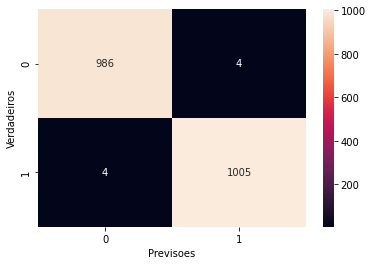

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Previsoes')
plt.ylabel('Verdadeiros')

In [ ]:
import pickle
pickle.dump(lr, open('logistic_regression.pkl', 'wb'))

In [ ]:
!pip install gradio

     |████████████████████████████████| 1.1MB 27.5MB/s 
     |████████████████████████████████| 1.9MB 47.9MB/s 
     |████████████████████████████████| 215kB 51.8MB/s 
     |████████████████████████████████| 962kB 36.3MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 3.2MB 47.8MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=f7a0c735ffd622ef35a06d554c66f2dc2fdf64ac9de3b284c68ca629ccda8881
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=1b5577c212707f408e41f5b2c073e5a2adc3eb35cd6d3fc74fa28d1d4a2b6db3
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
Successfully built flask-cachebuster ffmpy


In [ ]:
lr = pickle.load(open('logistic_regression.pkl', 'rb'))
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
import gradio as gr
from PIL import Image
def recognize_mask(img):
    img=Image.fromarray(img)
    vector = fe.img_to_vector(img)
    label = lr.predict(vector)
    confidence = lr.predict_proba(vector)
    return label[0], confidence[0]

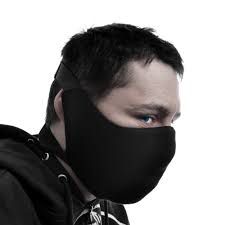

In [ ]:
with_mask_list = glob.glob('/content/data/pictures/with_mask/*.*')
img=Image.open(random.choice(with_mask_list))
img

In [ ]:
recognize_mask(img)

('with_mask', array([9.99999718e-01, 2.81724805e-07]))

In [ ]:
gr.Interface(fn=recognize_mask, inputs="image", outputs="text").launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://20234.gradio.app
Interface loading below...


KeyboardInterrupt: ignored

In [ ]:
webcam = gr.inputs.Image(shape=(224, 224), source="webcam")
gr.Interface(fn=recognize_mask, inputs=webcam, outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://16263.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7864/',
 'https://16263.gradio.app')